In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#define the data you want to explore
local_path = '../saved_sims/pi_calculator/'
scaling = 'scaled/'
txt_file = 'randomly_generated_prices_and_delays.txt'

# read header only as CSV with "|" as separator
header = pd.read_csv(local_path+scaling+txt_file, sep="|", nrows=1)
headings = header.columns

# skip header line, read the rest as CSV with " " as separator
data = pd.read_csv(local_path+scaling+txt_file, sep=" ", header=None, skiprows=1)
# name columns after the columns names in the header (remove spaces)
data.columns = [x.replace(' ','') for x in headings]
headings = data.columns

In [3]:
#inspect data
data

,MarketPrice(WAD),RedemptionPrice(RAY),RedemptionRate(%),PerSecondRedemptionRate(RAY),RedemptionRateTimeline(Seconds),Proportional(NoGain),Proportional(WithGain),Integral(NoGain),Integral(WithGain),DelaySinceLastUpdate
0,4014310777352475768,4200000000000000000000000000,4.421172,1000000001371837532460062900,31536000,44211719677981960000000000,44211719677981960000000000,0,0,25759
1,4430910021226100781,4200115742978583893637748241,-5.495783,999999998207581008990985083,31536000,-54949504340050681263273772,-54949504340050681263273772,-107850309145818236368321765968,-8321783113085949670161,20088
2,3971834976482114143,4200004962749288514572305581,5.432036,1000000001677332273075649030,31536000,54326123014344293900006873,54326123014344293900006873,-74699498455480844215414069482,-5763850189454125714400,14716
3,4122263615903287715,4200131292072051337172841502,0.000000,1000000000000000000000000000,31536000,18539343357133284035839518,18539343357133284035839518,609114593403030952051449757407,46999582824210184698855,17932
4,4449131616266682521,4200131292072051337172841502,-5.928776,999999998061961159478983063,31536000,-59283938257985221287410766,-59283938257985221287410766,-49589641678495953097362339026,-3826361240616728907613,19386
5,4435037999142589449,4199990089560534183437724186,-5.604335,999999998171136494917732307,31536000,-55963920049785044941613307,-55963920049785044941613307,-1029449486803430423695084228180,-79432830771704411169948,17347
6,4216234993544726528,4199818364290551978549470425,0.000000,1000000000000000000000000000,31536000,-3908890297199246600738351,-3908890297199246600738351,-1204392354906940345065682063025,-92931508866082963654897,22356
7,4468539749784589787,4199818364290551978549470425,-6.409880,999999997899373438414727389,31536000,-63984049352913186203553084,-63984049352913186203553084,-1487112965614080492352167670894,-114746370803316921094420,28318
8,4170443790090416769,4199610420183452196300200023,0.000000,1000000000000000000000000000,31536000,6945079941905977348102899,6945079941905977348102899,-1418246452705449903809465619500,-109432596659143514752148,23571
9,4105554523097509900,4199610411361638999352552887,2.235859,1000000000701176450235152520,31536000,22396336576761979696828050,22396336576761979696828050,-489194730791453415190716988168,-37746507005434868067181,20192


In [4]:
#define normalizing constants
WAD = 10**18
RAY = 10**27
RAD = 10**45

In [5]:
#convert to numerical data to floating points for viz libraries
for c in headings:
    data[c]=data[c].apply(float)


In [6]:
data

,MarketPrice(WAD),RedemptionPrice(RAY),RedemptionRate(%),PerSecondRedemptionRate(RAY),RedemptionRateTimeline(Seconds),Proportional(NoGain),Proportional(WithGain),Integral(NoGain),Integral(WithGain),DelaySinceLastUpdate
0,4.014311e+18,4.200000e+27,4.421172,1.000000e+27,31536000.0,4.421172e+25,4.421172e+25,0.000000e+00,0.000000e+00,25759.0
1,4.430910e+18,4.200116e+27,-5.495783,1.000000e+27,31536000.0,-5.494950e+25,-5.494950e+25,-1.078503e+29,-8.321783e+21,20088.0
2,3.971835e+18,4.200005e+27,5.432036,1.000000e+27,31536000.0,5.432612e+25,5.432612e+25,-7.469950e+28,-5.763850e+21,14716.0
3,4.122264e+18,4.200131e+27,0.000000,1.000000e+27,31536000.0,1.853934e+25,1.853934e+25,6.091146e+29,4.699958e+22,17932.0
4,4.449132e+18,4.200131e+27,-5.928776,1.000000e+27,31536000.0,-5.928394e+25,-5.928394e+25,-4.958964e+28,-3.826361e+21,19386.0
5,4.435038e+18,4.199990e+27,-5.604335,1.000000e+27,31536000.0,-5.596392e+25,-5.596392e+25,-1.029449e+30,-7.943283e+22,17347.0
6,4.216235e+18,4.199818e+27,0.000000,1.000000e+27,31536000.0,-3.908890e+24,-3.908890e+24,-1.204392e+30,-9.293151e+22,22356.0
7,4.468540e+18,4.199818e+27,-6.409880,1.000000e+27,31536000.0,-6.398405e+25,-6.398405e+25,-1.487113e+30,-1.147464e+23,28318.0
8,4.170444e+18,4.199610e+27,0.000000,1.000000e+27,31536000.0,6.945080e+24,6.945080e+24,-1.418246e+30,-1.094326e+23,23571.0
9,4.105555e+18,4.199610e+27,2.235859,1.000000e+27,31536000.0,2.239634e+25,2.239634e+25,-4.891947e+29,-3.774651e+22,20192.0


In [7]:
#normalize data to "USD" dimension
data['MarketPrice(USD)'] = data['MarketPrice(WAD)']/WAD
data['RedemptionPrice(USD)'] = data['RedemptionPrice(RAY)']/RAY
data['time'] = data['RedemptionRateTimeline(Seconds)'].cumsum()

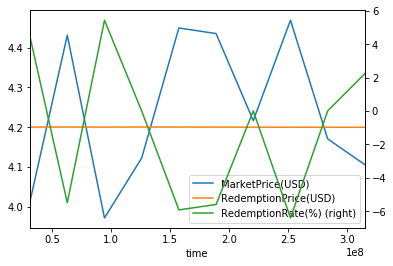

In [8]:
data.plot(x='time',y=['MarketPrice(USD)','RedemptionPrice(USD)'])
data.plot(x='time', y='RedemptionRate(%)',secondary_y=True, ax=plt.gca())

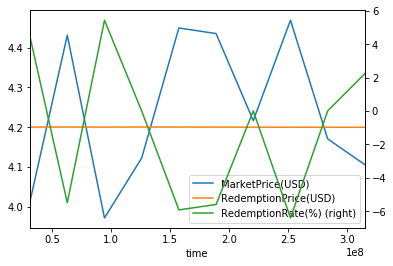

In [9]:
T=25
data.tail(T).plot(x='time',y=['MarketPrice(USD)','RedemptionPrice(USD)'])
data.tail(T).plot(x='time', y='RedemptionRate(%)',secondary_y=True, ax=plt.gca())

In [10]:
data['MarketPrice(USD)']

0    4.014311
1    4.430910
2    3.971835
3    4.122264
4    4.449132
5    4.435038
6    4.216235
7    4.468540
8    4.170444
9    4.105555
Name: MarketPrice(USD), dtype: float64

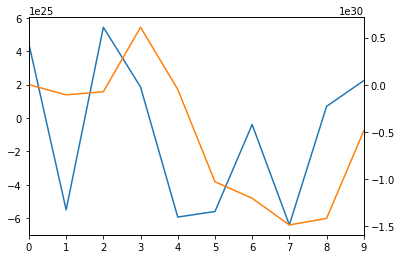

In [11]:
plt.figure()
data['Proportional(NoGain)'].plot()
data['Integral(NoGain)'].plot(secondary_y=True,  ax=plt.gca())

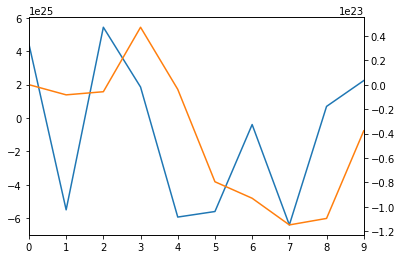

In [12]:
plt.figure()
data['Proportional(WithGain)'].plot()
data['Integral(WithGain)'].plot(secondary_y=True,  ax=plt.gca())